# Figure -  Activity 


Main
1. 
2. 

Supplemental possible:
1.Grouped bar of amplitude, duration, response magnitude (mouseID scatter)
2. AUC, Frequency across days, show that it is stable
3. response magnitude (s*df) (place, running, all) consistent with freq and auc
4. spike frequency

Stats


## Import modules and params

In [29]:
FIG_FORMAT = 'interactive'
#FIG_FORMAT = 'interactive'
circ_var_pcs = False
label_every_n=1

# plot
import matplotlib as mpl
if FIG_FORMAT == 'svg':
    mpl.use('agg')
elif FIG_FORMAT == 'pdf':
    mpl.use('pdf')
elif FIG_FORMAT == 'interactive':
    #mpl.use('nbAgg')
    %matplotlib inline
import matplotlib.pyplot as plt
import seaborn.apionly as sns
from mpl_toolkits.axes_grid.inset_locator import inset_axes

#warnings
import warnings
warnings.filterwarnings("ignore", message="numpy.dtype size changed")
warnings.filterwarnings("ignore", message="numpy.ufunc size changed")

# python
import numpy as np
import os.path
import sys

# lab
import lab
import lab.analysis.place_cell_analysis as place
from lab.plotting import plot_metric
from lab.analysis import intervals as inter
import lab.analysis.imaging_analysis as ia
from lab import ExperimentSet
import lab.plotting as plotting
sys.path.insert(0, '/home/matt/code/analysis/mjd/')
import creb_analysis as creb

# import styles from creb_analysis
channel=creb.CHANNEL
label=creb.IMAGING_LABEL
markers=creb.markers
linestyles=creb.linestyles

group_labels=creb.labels
CREB_label=creb.labels[0]
DN_label=creb.labels[1]
GCAMP_label=creb.labels[2]

colors = creb.colors
CREB_color=creb.colors[0]
DN_color=creb.colors[1]
GCAMP_color=creb.colors[2]

#save_dir = creb.fig_save_dir
filename = 'Fig_activity.{}'.format(FIG_FORMAT)

## Load experiments

In [2]:
exptDicts = creb.initializeExperimentGroups('hidden',from_file=True,
            save_to_json=False, signal='spikes')


exptGrps=[exptDicts['CREB_place_set'],
        exptDicts['DN_place_set'],
        exptDicts['GCAMP_place_set']]

# FILTERS
roi_filters=[None] * len(exptGrps)

LOADED EXPERIMENT GROUPS: CREB,DN,GCAMP


## Main

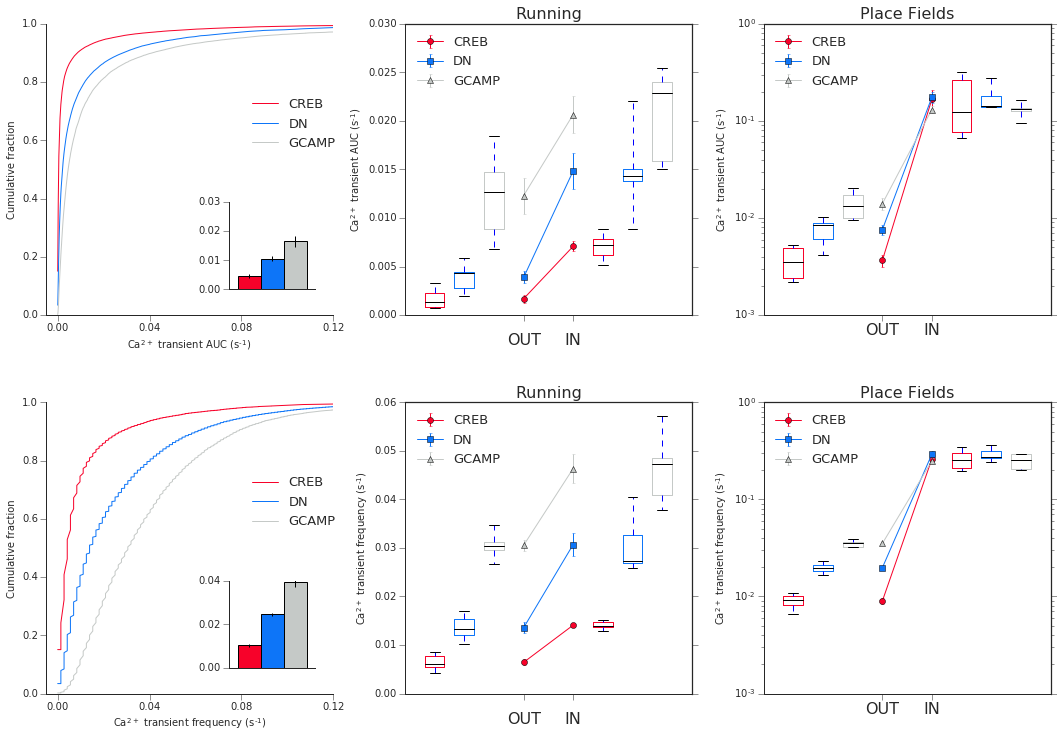

In [16]:
title_size=16
legend_fontsize=13
plt.rcParams['figure.facecolor'] = 'white'

#fig = plt.figure(figsize=(8.5, 11))
fig = plt.figure(figsize=(18, 12))

norm_auc_ax=fig.add_subplot(231)
run_auc_ax= fig.add_subplot(232)
pc_auc_ax= fig.add_subplot(233)
trans_freq_ax=fig.add_subplot(234)
run_freq_ax= fig.add_subplot(235)
pc_freq_ax= fig.add_subplot(236)

freq_label=r'$\mathdefault{Ca^{2+}}$ transient frequency ($\mathdefault{s^{-1}}$)'
auc_label=r'$\mathdefault{Ca^{2+}}$ transient AUC ($\mathdefault{s^{-1}}$)'

# insets
norm_auc_inset_ax=inset_axes(norm_auc_ax, width="100%", height="100%",
                               bbox_to_anchor=(.65, .1, .3, .3),
                               bbox_transform=norm_auc_ax.transAxes)

trans_freq_inset_ax=inset_axes(trans_freq_ax, width="100%", height="100%",
                               bbox_to_anchor=(.65, .1, .3, .3),
                               bbox_transform=trans_freq_ax.transAxes)

plt.subplots_adjust(wspace=.25,hspace=.3)


params={}
# --- CDF NORM AUC ------------------------------------------------------------------------------
norm_auc_params={}
norm_auc_params['norm_auc_range'] = (-0.005,.1)
norm_auc_params['norm_auc_xticks'] = [0,0.04, 0.08,0.12]
params.update(norm_auc_params)

groupby=[['roi_id','expt']]
data_out=plot_metric(
        ax=norm_auc_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='cdf',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'norm transient auc2'},
        activity_label=auc_label,colors=colors,rotate_labels=False,
        return_full_dataframes=False)
norm_auc_ax.legend(loc=(.7, .55), fontsize=legend_fontsize)
norm_auc_ax.set_title('')
norm_auc_ax.set_xlim(params['norm_auc_range'])
norm_auc_ax.set_xticks(params['norm_auc_xticks'])
norm_auc_ax.spines['left'].set_linewidth(1)
norm_auc_ax.spines['bottom'].set_linewidth(1)

# norm auc inset
groupby=[['mouseID']]
data_out=plot_metric(
        ax=norm_auc_inset_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='grouped_bar',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'norm transient auc2'},
        activity_label="",colors=colors)
norm_auc_inset_ax.set_title('')
norm_auc_inset_ax.set_ylabel('')
norm_auc_inset_ax.set_xlabel('')
norm_auc_inset_ax.get_legend().set_visible(False)
sns.despine(ax=norm_auc_inset_ax)
norm_auc_inset_ax.tick_params(bottom=False, labelbottom=False)
norm_auc_inset_ax.set_ylim(0, .03)
norm_auc_inset_ax.set_yticks([0, .01, .02,.03])
norm_auc_inset_ax.spines['left'].set_linewidth(1)
norm_auc_inset_ax.spines['bottom'].set_linewidth(1)
norm_auc_inset_ax.set_xlim(-.1, .9)
# --- CDF TRANS FREQ ------------------------------------------------------------------------------
trans_freq_params={}
trans_freq_params['trans_freq_range'] = (-0.005,.1)
trans_freq_params['trans_freq_xticks'] = [0,0.04, 0.08,0.12]
params.update(trans_freq_params)

groupby=[['roi_id','expt']]
data_out=plot_metric(
        ax=trans_freq_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='cdf',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'frequency'},
        activity_label=freq_label, colors=colors,rotate_labels=False,
        return_full_dataframes=False)
trans_freq_ax.legend(loc=(.7, .55), fontsize=legend_fontsize)
trans_freq_ax.set_title('')
trans_freq_ax.set_xlim(params['trans_freq_range'])
trans_freq_ax.set_xticks(params['trans_freq_xticks'])
trans_freq_ax.spines['left'].set_linewidth(1)
trans_freq_ax.spines['bottom'].set_linewidth(1)

# trans freq inset
groupby=[['mouseID']]
data_out=plot_metric(
        ax=trans_freq_inset_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='grouped_bar',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'frequency'},
        activity_label="",colors=colors)
trans_freq_inset_ax.set_title('')
trans_freq_inset_ax.set_ylabel('')
trans_freq_inset_ax.set_xlabel('')
trans_freq_inset_ax.get_legend().set_visible(False)
sns.despine(ax=trans_freq_inset_ax)
trans_freq_inset_ax.tick_params(bottom=False, labelbottom=False)
trans_freq_inset_ax.set_ylim(0, .04)
trans_freq_inset_ax.set_yticks([0, .02, .04])
trans_freq_inset_ax.spines['left'].set_linewidth(1)
trans_freq_inset_ax.spines['bottom'].set_linewidth(1)
trans_freq_inset_ax.set_xlim(-.1, .9)
# --- AUC RUNNING ------------------------------------------------------------------------------
interval_kwargs = {}
kwargs = {}
kwargs.update(interval_kwargs)
in_intervals = [inter.running_intervals(
    expt_grp, **kwargs) for expt_grp in exptGrps]
out_intervals = [~ints for ints in in_intervals]

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
        {'stat': 'norm transient auc2', 'interval': grp_interval, 'channel': channel, 'label': label}
        for grp_interval in in_intervals]
run_auc_in = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors,return_full_dataframes=False)
plt.close(tmp_fig)

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
    {'stat': 'norm transient auc2', 'interval': grp_interval, 'channel': channel, 'label': label}
    for grp_interval in out_intervals]
run_auc_out = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors, return_full_dataframes=False)
plt.close(tmp_fig)

# prep dataframe
creb_run_auc_in = run_auc_in[CREB_label]['dataframe']
dn_run_auc_in = run_auc_in[DN_label]['dataframe']
gcamp_run_auc_in = run_auc_in[GCAMP_label]['dataframe']

creb_run_auc_out = run_auc_out[CREB_label]['dataframe']
dn_run_auc_out = run_auc_out[DN_label]['dataframe']
gcamp_run_auc_out = run_auc_out[GCAMP_label]['dataframe']

for dataframe in (creb_run_auc_in,dn_run_auc_in,gcamp_run_auc_in):
    dataframe['int'] = 'IN'
for dataframe in (creb_run_auc_out,dn_run_auc_out,gcamp_run_auc_out):
    dataframe['int'] = 'OUT'

CREB_data = creb_run_auc_in.append(creb_run_auc_out,ignore_index=True)
DN_data = dn_run_auc_in.append(dn_run_auc_out,ignore_index=True)
GCAMP_data= gcamp_run_auc_in.append(gcamp_run_auc_out,ignore_index=True)

order_dict = {'OUT': 0, 'IN': 1}
CREB_data['order'] = CREB_data['int'].map(order_dict)
DN_data['order'] = DN_data['int'].map(order_dict)
GCAMP_data['order'] = GCAMP_data['int'].map(order_dict)
line_kwargs = {'markersize': 6}

data=plotting.plot_dataframe(
        run_auc_ax, [CREB_data, DN_data,GCAMP_data],
        labels=group_labels, activity_label='', groupby=[['int', 'mouseID']],
        plotby=('int',), plot_method='box_and_line', colors=colors,
        orderby='order', notch=False, 
        line_kwargs=line_kwargs, markers=markers,
        flierprops={'markersize': 3, 'marker': 'o'}, whis='range')
run_auc_ax.legend(loc="upper left", fontsize=legend_fontsize)
run_auc_ax.set_title('Running',fontsize=title_size)
run_auc_ax.set_ylabel(auc_label)
run_auc_ax.set_xlabel('')
run_auc_ax.spines['left'].set_linewidth(1)
run_auc_ax.spines['bottom'].set_linewidth(1)
run_auc_ax.tick_params(axis='x', which='major', labelsize=16)
run_auc_ax.tick_params(top='off')

# --- FREQ RUNNING -------------------------------------------------------------------------

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
        {'stat': 'frequency', 'interval': grp_interval, 'channel': channel, 'label': label}
        for grp_interval in in_intervals]
run_freq_in = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors,return_full_dataframes=False)
plt.close(tmp_fig)

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
    {'stat': 'frequency', 'interval': grp_interval, 'channel': channel, 'label': label}
    for grp_interval in out_intervals]
run_freq_out = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors, return_full_dataframes=False)
plt.close(tmp_fig)

# prep dataframe
creb_run_freq_in = run_freq_in[CREB_label]['dataframe']
dn_run_freq_in = run_freq_in[DN_label]['dataframe']
gcamp_run_freq_in = run_freq_in[GCAMP_label]['dataframe']

creb_run_freq_out = run_freq_out[CREB_label]['dataframe']
dn_run_freq_out = run_freq_out[DN_label]['dataframe']
gcamp_run_freq_out = run_freq_out[GCAMP_label]['dataframe']

for dataframe in (creb_run_freq_in,dn_run_freq_in,gcamp_run_freq_in):
    dataframe['int'] = 'IN'
for dataframe in (creb_run_freq_out,dn_run_freq_out,gcamp_run_freq_out):
    dataframe['int'] = 'OUT'

CREB_data = creb_run_freq_in.append(creb_run_freq_out,ignore_index=True)
DN_data = dn_run_freq_in.append(dn_run_freq_out,ignore_index=True)
GCAMP_data= gcamp_run_freq_in.append(gcamp_run_freq_out,ignore_index=True)

order_dict = {'OUT': 0, 'IN': 1}
CREB_data['order'] = CREB_data['int'].map(order_dict)
DN_data['order'] = DN_data['int'].map(order_dict)
GCAMP_data['order'] = GCAMP_data['int'].map(order_dict)
line_kwargs = {'markersize': 6}

data=plotting.plot_dataframe(
        run_freq_ax, [CREB_data, DN_data,GCAMP_data],
        labels=group_labels, activity_label='', groupby=[['int', 'mouseID']],
        plotby=('int',), plot_method='box_and_line', colors=colors,
        orderby='order', notch=False, 
        line_kwargs=line_kwargs, markers=markers,
        flierprops={'markersize': 3, 'marker': 'o'}, whis='range')
run_freq_ax.legend(loc="upper left", fontsize=legend_fontsize)
run_freq_ax.set_title('Running',fontsize=title_size)
run_freq_ax.set_ylabel(freq_label)
run_freq_ax.set_xlabel('')
run_freq_ax.spines['left'].set_linewidth(1)
run_freq_ax.spines['bottom'].set_linewidth(1)
run_freq_ax.tick_params(axis='x', which='major', labelsize=16)
run_freq_ax.tick_params(top=False)

# --- AUC PLACE CELLS ------------------------------------------------------------------------
kwargs = {}
interval_kwargs ={}
kwargs.update(interval_kwargs)
in_intervals = [inter.place_fields(
    expt_grp, roi_filter=roi_filter, **kwargs) for
    expt_grp, roi_filter in zip(exptGrps, roi_filters)]
out_intervals = [~ints for ints in in_intervals]

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
        {'stat': 'norm transient auc2', 'interval': grp_interval, 'channel': channel, 'label': label}
        for grp_interval in in_intervals]
pc_auc_in = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors,return_full_dataframes=False)
plt.close(tmp_fig)

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
    {'stat': 'norm transient auc2', 'interval': grp_interval, 'channel': channel, 'label': label}
    for grp_interval in out_intervals]
pc_auc_out = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors, return_full_dataframes=False)
plt.close(tmp_fig)

#auc change dataframe
creb_pc_auc_in = pc_auc_in[CREB_label]['dataframe']
dn_pc_auc_in = pc_auc_in[DN_label]['dataframe']
gcamp_pc_auc_in = pc_auc_in[GCAMP_label]['dataframe']

creb_pc_auc_out = pc_auc_out[CREB_label]['dataframe']
dn_pc_auc_out = pc_auc_out[DN_label]['dataframe']
gcamp_pc_auc_out = pc_auc_out[GCAMP_label]['dataframe']

for dataframe in (creb_pc_auc_in,dn_pc_auc_in,gcamp_pc_auc_in):
    dataframe['int'] = 'IN'
for dataframe in (creb_pc_auc_out,dn_pc_auc_out,gcamp_pc_auc_out):
    dataframe['int'] = 'OUT'

CREB_data = creb_pc_auc_in.append(creb_pc_auc_out,ignore_index=True)
DN_data = dn_pc_auc_in.append(dn_pc_auc_out,ignore_index=True)
GCAMP_data= gcamp_pc_auc_in.append(gcamp_pc_auc_out,ignore_index=True)

order_dict = {'OUT': 0, 'IN': 1}
CREB_data['order'] = CREB_data['int'].map(order_dict)
DN_data['order'] = DN_data['int'].map(order_dict)
GCAMP_data['order'] = GCAMP_data['int'].map(order_dict)
line_kwargs = {'markersize': 6}

data=plotting.plot_dataframe(
        pc_auc_ax, [CREB_data, DN_data,GCAMP_data],
        labels=group_labels, activity_label='', groupby=[['int', 'mouseID']],
        plotby=('int',), plot_method='box_and_line', colors=colors,
        orderby='order', notch=False, 
        line_kwargs=line_kwargs, markers=markers,
        flierprops={'markersize': 3, 'marker': 'o'}, whis='range')
pc_auc_ax.set_yscale("log")
pc_auc_ax.legend(loc=("upper left"), fontsize=legend_fontsize)
pc_auc_ax.set_title('Place Fields',fontsize=title_size)
pc_auc_ax.set_ylabel(auc_label)
pc_auc_ax.set_xlabel('')
pc_auc_ax.spines['left'].set_linewidth(1)
pc_auc_ax.spines['bottom'].set_linewidth(1)
pc_auc_ax.tick_params(top=False)
pc_auc_ax.tick_params(axis='x', which='major', labelsize=16)


# ---FREQ PLACE CELLS-----------------------------------------------------------------------
tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
        {'stat': 'frequency', 'interval': grp_interval, 'channel': channel, 'label': label}
        for grp_interval in in_intervals]
pc_freq_in = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors,return_full_dataframes=False)
plt.close(tmp_fig)

tmp_fig = plt.figure()
tmp_ax = tmp_fig.add_subplot(111)
activity_kwargs = [
    {'stat': 'frequency', 'interval': grp_interval, 'channel': channel, 'label': label}
    for grp_interval in out_intervals]
pc_freq_out = plot_metric(
    tmp_ax, exptGrps, metric_fn=ia.population_activity_new,
    plot_method='grouped_bar', roi_filters=roi_filters, groupby=[['expt']],
    plotby=None, activity_kwargs=activity_kwargs, activity_label='',
    label_every_n=label_every_n, colors=colors, return_full_dataframes=False)
plt.close(tmp_fig)

creb_pc_freq_in = pc_freq_in[CREB_label]['dataframe']
dn_pc_freq_in = pc_freq_in[DN_label]['dataframe']
gcamp_pc_freq_in = pc_freq_in[GCAMP_label]['dataframe']

creb_pc_freq_out = pc_freq_out[CREB_label]['dataframe']
dn_pc_freq_out = pc_freq_out[DN_label]['dataframe']
gcamp_pc_freq_out = pc_freq_out[GCAMP_label]['dataframe']

for dataframe in (creb_pc_freq_in,dn_pc_freq_in,gcamp_pc_freq_in):
    dataframe['int'] = 'IN'
for dataframe in (creb_pc_freq_out,dn_pc_freq_out,gcamp_pc_freq_out):
    dataframe['int'] = 'OUT'

CREB_data = creb_pc_freq_in.append(creb_pc_freq_out,ignore_index=True)
DN_data = dn_pc_freq_in.append(dn_pc_freq_out,ignore_index=True)
GCAMP_data= gcamp_pc_freq_in.append(gcamp_pc_freq_out,ignore_index=True)

order_dict = {'OUT': 0, 'IN': 1}
CREB_data['order'] = CREB_data['int'].map(order_dict)
DN_data['order'] = DN_data['int'].map(order_dict)
GCAMP_data['order'] = GCAMP_data['int'].map(order_dict)
line_kwargs = {'markersize': 6}

data=plotting.plot_dataframe(
        pc_freq_ax, [CREB_data, DN_data,GCAMP_data],
        labels=group_labels, activity_label='', groupby=[['int', 'mouseID']],
        plotby=('int',), plot_method='box_and_line', colors=colors,
        orderby='order', notch=False, 
        line_kwargs=line_kwargs, markers=markers,
        flierprops={'markersize': 3, 'marker': 'o'}, whis='range')
pc_freq_ax.set_yscale("log")
pc_freq_ax.legend(loc=("upper left"), fontsize=legend_fontsize)
pc_freq_ax.set_title('Place Fields',fontsize=title_size)
pc_freq_ax.set_ylabel(freq_label)
pc_freq_ax.set_xlabel('')
pc_freq_ax.spines['left'].set_linewidth(1)
pc_freq_ax.spines['bottom'].set_linewidth(1)
pc_freq_ax.tick_params(top=False)
pc_freq_ax.tick_params(axis='x', which='major', labelsize=16)


plt.show()

In [ ]:
# Inset options

#run_auc_ax.set_xlim(-0.6, 0.6)
#run_auc_ax.set_xlim([])
#run_auc_ax.set_xticks([])

# cant get ride of right ticks
#pc_auc_ax.tick_params(right=False)
#pc_auc_ax.spines['top'].set_linewidth(0) # set box off
#pc_auc_ax.spines['right'].set_linewidth(0) # set box off

## Find good traces

In [ ]:
# get metric to find traces
groupby=[['mouseID','roi_id','expt']]
data=plot_metric(
        ax=trans_freq_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='cdf',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'frequency'},
        activity_label=freq_label, colors=colors,rotate_labels=False,
        return_full_dataframes=False)

In [144]:
# set options to slice df
df=data['GCAMP']['dataframe']
df = df[df['value'].between(.05,.06, inclusive=True)] # .009, .011 G: 0.045, .05
df[df['mouseID'] == "mjd535"].tail()

,mouseID,roi_id,expt,value
10530,mjd535,_VI2Q9kMk5tKw,[[]],0.059722
10532,mjd535,_VI2Q9kMk5tKw,[[]],0.050000
10534,mjd535,_VI2Q9kMk5tKw,[[]],0.052778
10543,mjd535,_ZP6tzPYV6nnT,[[]],0.058333
10550,mjd535,_ZP6tzPYV6nnT,[[]],0.055556


In [145]:
# look at above df from row numbers
row=10534
print df.expt[row]
df.roi_id[row]


< Experiment: mjd535_2018-06-23-16h57m05s, hiddenRewards, signals=2018-06-27-19h30m05s, action=create, display_color=[0, 204, 0], duration=30, durations=[30], id=reward, initial_open=0, locations=[1610.0], operant_rate=1, pin=5, sensor=2, timeout=2005, type=operant, valves=[5], window_duration=3, window_length=160.0>


'_VI2Q9kMk5tKw'

## Traces

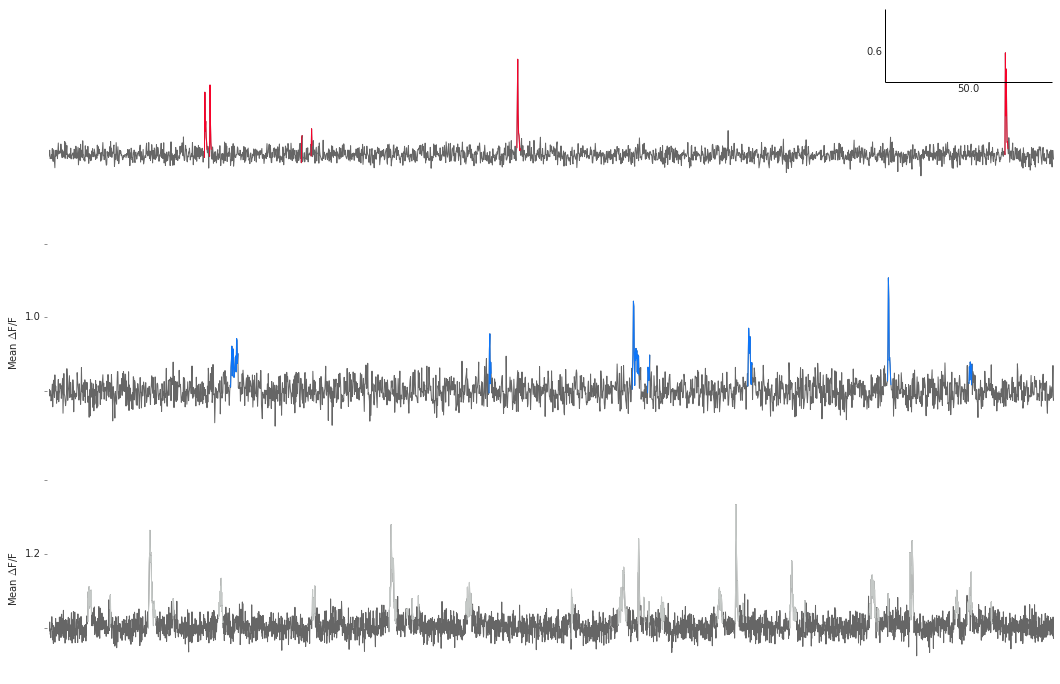

In [175]:
plt.rcParams['figure.facecolor'] = 'white'

plt.subplots_adjust(hspace=0)
fig = plt.figure(figsize=(18, 12))



creb_trace_ax= fig.add_subplot(311)
dn_trace_ax=fig.add_subplot(312)
gcamp_trace_ax= fig.add_subplot(313)

 
exptSet = ExperimentSet('mdavis.sql')
creb_expt = exptSet.grabExpt('mjd533', '2018-06-08-12h26m31s')
dn_expt = exptSet.grabExpt('mjd527', '2018-04-22-15h14m51s')
gcamp_expt = exptSet.grabExpt('mjd503', '2017-12-04-19h19m30s')


pc_expt_grp = place.pcExperimentGroup(
    [creb_expt, dn_expt,gcamp_expt], imaging_label='soma')
creb_id = '0020-0101'
dn_id = '0004-0132'
gcamp_id = '0076-0114'
creb_idx = creb_expt.roi_ids().index(creb_id)
dn_idx = dn_expt.roi_ids().index(dn_id)
gcamp_idx = gcamp_expt.roi_ids().index(gcamp_id)

creb_imaging_data = creb_expt.imagingData(
    channel='Ch2', label='soma', dFOverF='from_file')
dn_imaging_data = dn_expt.imagingData(
    channel='Ch2', label='soma', dFOverF='from_file')
gcamp_imaging_data = gcamp_expt.imagingData(
    channel='Ch2', label='soma', dFOverF='from_file')

creb_transients = creb_expt.transientsData(
    threshold=95, channel='Ch2', label='soma')
dn_transients = dn_expt.transientsData(
    threshold=95, channel='Ch2', label='soma')
gcamp_transients = gcamp_expt.transientsData(
    threshold=95, channel='Ch2', label='soma')

place.plotImagingData(
    roi_tSeries=creb_imaging_data[creb_idx, :, 0], ax=creb_trace_ax,
    roi_transients=creb_transients[creb_idx][0], position=None,
    imaging_interval=creb_expt.frame_period(), placeField=None,
    xlabel_visible=False, ylabel_visible=True, right_label=True,
    placeFieldColor=None, title='', rasterized=False, color='.4',
    transients_color=CREB_color)
sns.despine(ax=creb_trace_ax, top=True, left=False, bottom=True, right=True)
#creb_trace_ax.set_ylabel(CREB_label, rotation='horizontal', ha='right')
creb_trace_ax.tick_params(bottom=False, labelbottom=False)
creb_trace_ax.tick_params(axis='y', direction='in', length=3, pad=3)
creb_trace_ax.spines['left'].set_linewidth(0)
creb_trace_ax.spines['left'].set_position(('outward', 5))

place.plotImagingData(
    roi_tSeries=dn_imaging_data[dn_idx, :, 0], ax=dn_trace_ax,
    roi_transients=dn_transients[dn_idx][0], position=None,
    imaging_interval=dn_expt.frame_period(), placeField=None,
    xlabel_visible=False, ylabel_visible=True, right_label=True,
    placeFieldColor=None, title='', rasterized=False, color='.4',
    transients_color=DN_color)
sns.despine(ax=dn_trace_ax, top=True, left=False, bottom=True, right=True)
#dn_trace_ax.set_ylabel(DN_label, rotation='horizontal', ha='right')
dn_trace_ax.tick_params(bottom=False, labelbottom=False)
dn_trace_ax.tick_params(axis='y', direction='in', length=3, pad=3)
dn_trace_ax.spines['left'].set_linewidth(0)
dn_trace_ax.spines['left'].set_position(('outward', 5))

place.plotImagingData(
    roi_tSeries=gcamp_imaging_data[gcamp_idx, :, 0], ax=gcamp_trace_ax,
    roi_transients=gcamp_transients[gcamp_idx][0], position=None,
    imaging_interval=gcamp_expt.frame_period(), placeField=None,
    xlabel_visible=False, ylabel_visible=True, right_label=True,
    placeFieldColor=None, title='', rasterized=False, color='.4',
    transients_color=GCAMP_color)
sns.despine(ax=gcamp_trace_ax, top=True, left=False, bottom=True, right=True)
#gcamp_trace_ax.set_ylabel(GCAMP_label, rotation='horizontal', ha='right')
gcamp_trace_ax.tick_params(bottom=False, labelbottom=False)
gcamp_trace_ax.tick_params(bottom=False, labelbottom=False)
gcamp_trace_ax.tick_params(axis='y', direction='in', length=3, pad=3)
gcamp_trace_ax.spines['left'].set_linewidth(0)
gcamp_trace_ax.spines['left'].set_position(('outward', 5))


y_min = min(creb_trace_ax.get_ylim()[0], dn_trace_ax.get_ylim()[0], gcamp_trace_ax.get_ylim()[0])
y_max = max(creb_trace_ax.get_ylim()[1], dn_trace_ax.get_ylim()[1], gcamp_trace_ax.get_ylim()[1])
creb_trace_ax.set_ylim(y_min, y_max)
dn_trace_ax.set_ylim(y_min, y_max)
gcamp_trace_ax.set_ylim(y_min, y_max)
creb_trace_ax.set_yticks([0, y_max/2, y_max]) #
dn_trace_ax.set_yticks([0, y_max/2,y_max])
gcamp_trace_ax.set_yticks([0, y_max/2, y_max])
#creb_trace_ax.set_yticklabels(['0', '{:0.1f}'.format(y_max)])
#dn_trace_ax.set_yticklabels(['0', '{:0.1f}'.format(y_max)])
#gcamp_trace_ax.set_yticklabels(['0', '{:0.1f}'.format(y_max)])
creb_trace_ax.set_xlim(300, 600) # Note only showing part of trial
dn_trace_ax.set_xlim(300, 600)
gcamp_trace_ax.set_xlim(300, 600)

import lab.plotting.plotting_helpers as ph

#scale bar ( can hide y axis)
ph.add_scalebar(creb_trace_ax, matchx=True, matchy=True, hidex=True, hidey=True,
               bar_thickness=0,loc=1)
#ph.add_scalebar(dn_trace_ax, matchx=False, matchy=False, hidex=True, hidey=True)
#ph.add_scalebar(gcamp_trace_ax, matchx=False, matchy=False, hidex=True, hidey=True)

## Supplemental

#### Spike frequency

In [ ]:
legend_fontsize=13
params={}
fig, spike_freq_ax = plt.subplots(1, 1, figsize=(6, 6))

spike_freq_inset_ax=inset_axes(spike_freq_ax, width="100%", height="100%",
                               bbox_to_anchor=(.65, .1, .3, .3),
                               bbox_transform=spike_freq_ax.transAxes)

# --- SPIKE FREQUENCY ---
# spike freq cdf
spike_freq_params={}
spike_freq_params['spike_freq_range'] = (-0.005,.1)
spike_freq_params['spike_freq_xticks'] = [0,0.04, 0.08,0.12]
params.update(spike_freq_params)

groupby=[['roi_id','expt']]
data_out=plot_metric(
        ax=spike_freq_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='cdf',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'binary_spike_frequency'},
        activity_label="Spike Frequency (spikes/s)",colors=colors,rotate_labels=False,
        return_full_dataframes=False)
spike_freq_ax.legend(loc=(.7, .55), fontsize=legend_fontsize)
spike_freq_ax.set_title('')
spike_freq_ax.set_xlim(params['spike_freq_range'])
spike_freq_ax.set_xticks(params['spike_freq_xticks'])
spike_freq_ax.spines['left'].set_linewidth(1)
spike_freq_ax.spines['bottom'].set_linewidth(1)

# spike freq inset
groupby=[['mouseID']]
data_out=plot_metric(
        ax=spike_freq_inset_ax, exptGrps=exptGrps, roi_filters=roi_filters,
        metric_fn=ia.population_activity_new, plot_method='grouped_bar',
        groupby=groupby, plotby=None, activity_kwargs={'stat': 'binary_spike_frequency'},
        activity_label="",colors=colors)
spike_freq_inset_ax.set_title('')
spike_freq_inset_ax.set_ylabel('')
spike_freq_inset_ax.set_xlabel('')
spike_freq_inset_ax.get_legend().set_visible(False)
sns.despine(ax=spike_freq_inset_ax)
spike_freq_inset_ax.tick_params(bottom=False, labelbottom=False)
spike_freq_inset_ax.set_ylim(0, .03)
spike_freq_inset_ax.set_yticks([0, .01, .02,.03])
spike_freq_inset_ax.spines['left'].set_linewidth(1)
spike_freq_inset_ax.spines['bottom'].set_linewidth(1)
spike_freq_inset_ax.set_xlim(-.1, .9)